# Explorative Data Analysis

In [32]:
import pandas as pd
from plotnine import *
import re
pd.set_option('display.max_rows', None)

In [33]:
train = pd.read_csv('data/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Summary Statistics

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


No missing data for id, text and target. Some missing data for keyword and location.

In [35]:
train.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


Some duplicate text. Retweets? Target is between 0 and 1, around 43% of the tweets in the training set are about disasters.

# Duplicate text

In [36]:
train[train['text'].duplicated(keep=False)]

,id,keyword,location,text,target
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
118,171,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
147,211,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
610,881,bioterrorism,NaN,To fight bioterrorism sir.,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0


In [37]:
train[train[['keyword','location','text','target']].duplicated(keep=False)]

,id,keyword,location,text,target
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
118,171,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
147,211,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
610,881,bioterrorism,NaN,To fight bioterrorism sir.,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0


87 completely duplicated, 179 duplicated text

In [38]:
train[train[['text','target']].duplicated(keep=False)]

,id,keyword,location,text,target
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
118,171,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
147,211,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
610,881,bioterrorism,NaN,To fight bioterrorism sir.,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0


Same text, not the same target... But only in 20 cases

# Keyword

## Missing data

In [39]:
train[train['keyword'].isnull()].head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [40]:
train['keyword'].isnull().sum()/len(train)

0.008012610009194798

<1 % missing data

## Univariate Analysis

In [41]:
df = train.groupby('keyword').size().reset_index(name='count')
df.sort_values(by='keyword')

,keyword,count
0,ablaze,36
1,accident,35
2,aftershock,34
3,airplane%20accident,35
4,ambulance,38
5,annihilated,34
6,annihilation,29
7,apocalypse,32
8,armageddon,42
9,army,34


In [42]:
df = train.groupby('keyword').size().reset_index(name='count')
df.sort_values(by='count')

,keyword,count
160,radiation%20emergency,9
134,inundation,10
194,threat,11
94,epicentre,12
115,forest%20fire,19
164,rescue,22
209,war%20zone,24
39,bush%20fires,25
15,battle,26
208,volcano,27


220 different keywords, used between 9-45 times. Many similar keywords used (synonyms, verbs/nouns with similar meaning (e.g. body bagging, body bag. Multiword keywords are seperated by %20.

## Keyword and target

In [43]:
df = train.groupby(['keyword','target']).size().reset_index(name='count')
df.sort_values(by=['keyword','target'])

,keyword,target,count
0,ablaze,0,23
1,ablaze,1,13
2,accident,0,11
3,accident,1,24
4,aftershock,0,34
5,airplane%20accident,0,5
6,airplane%20accident,1,30
7,ambulance,0,18
8,ambulance,1,20
9,annihilated,0,23


## Keyword ideas

Keyword may be a good feature, but there are many different ones and they all seem to be used more or less regularly (9-45 times)
Many keywords are similar, stem/manually group them/convert to wordvec?

# Location

In [53]:
train['has_location'] = ~train['location'].isnull()
sum(train['has_location'])

5080

In [67]:
train.groupby(['has_location','target']).size()

has_location  target
False         0         1458
              1         1075
True          0         2884
              1         2196
dtype: int64

In [44]:
df = train.groupby('location').size().reset_index(name ='count')
df = df.sort_values(by='count',ascending=False)
df

,location,count
2643,USA,104
1826,New York,71
2662,United States,50
1506,London,45
587,Canada,29
1860,Nigeria,28
2632,UK,27
1534,"Los Angeles, CA",26
1262,India,24
1719,Mumbai,22


Many locations only occur once. Check how much is covered by the top X locations.

In [45]:
df['cum percent'] = round(100.0*df['count'].cumsum()/df['count'].sum())
df['nr'] = range(len(df))
df

,location,count,cum percent,nr
2643,USA,104,2.0,0
1826,New York,71,3.0,1
2662,United States,50,4.0,2
1506,London,45,5.0,3
587,Canada,29,6.0,4
1860,Nigeria,28,6.0,5
2632,UK,27,7.0,6
1534,"Los Angeles, CA",26,7.0,7
1262,India,24,8.0,8
1719,Mumbai,22,8.0,9


## Location ideas

Whether or not location information is provided may be used as a feature.

Too many locations with too few datapoint so use as is. Many locations do not seem to be 'real' world locations (e.g. 'Where I Need To Be'. Use a geocoder to find longitude/lattitude/validity of locations?

# Tweet text

In [16]:
train['text'].head(20).values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       '13,000 people receive #wildfires evacuation orders in California ',
       'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
       '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
       '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
       "I'm on top of the hill and I can see a fire in the woods...",
       "There's an emergency evacuation happening now in the building across the street",
       "I'm afraid that the tornado is coming to our area...",
       'Three people died from the heat wave so far',
       'Haha South Tampa is getting flooded hah-

Tweets may need some cleanup. They may contain:
* Hashtags (#)
* URLs
* Smileys
* At/Replies (@)

## Analysis of special Tweet content

In [17]:
train['target'] = train['target']==1

In [18]:
from itertools import chain
from preprocessor.defines import Patterns
def analyse_pattern(pattern, name):
    train[name] = train['text'].str.lower().apply(lambda x: pattern.findall(x))
    train['num_' + name] = train[name].apply(lambda x: len(x))
    print(train['num_'+name].describe())
    print(ggplot(train, aes(x='num_'+name))+geom_histogram(aes(y = '..density..'),binwidth=1))
    print(train.groupby(['num_'+name,'target']).size())
    print(ggplot(train, aes(x='target', y='num_'+name, color='target'))+geom_boxplot())
    
    name_set = set(chain.from_iterable(train[name].values))
    name_list = list(chain.from_iterable(train[name].values))
    print("Number of different", name, ":", len(name_set))
    print("Number of ",name ,":", len(name_list))
    names = pd.Series(0, index=list(name_set))
    for name in name_list:
        names[name]+=1
    print(names.sort_values(ascending=False).head(30))

## Hashtags

count    7613.000000
mean        0.446999
std         1.099841
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: num_hash, dtype: float64


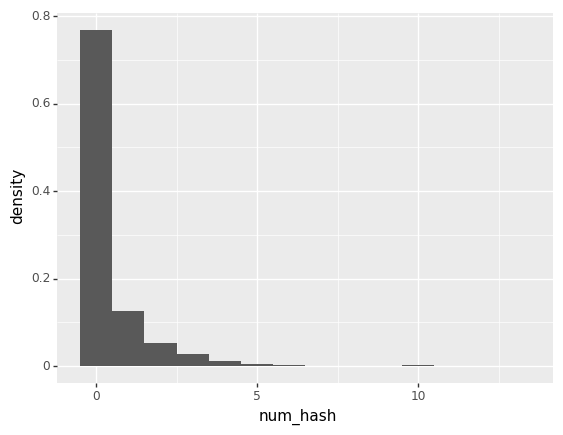

<ggplot: (8726870489498)>
num_hash  target
0         False     3456
          True      2396
1         False      482
          True       482
2         False      202
          True       203
3         False      108
          True       100
4         False       45
          True        38
5         False       18
          True        23
6         False       19
          True         7
7         False        4
          True         4
8         False        1
          True         7
9         False        2
10        False        3
          True         7
11        False        2
13        True         4
dtype: int64


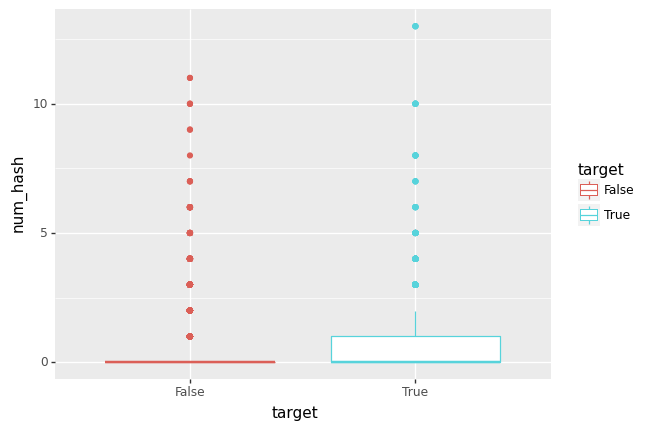

<ggplot: (8726870489489)>
Number of different hash : 1933
Number of  hash : 3403
#news            76
#                67
#hot             31
#best            30
#prebreak        30
#nowplaying      23
#islam           23
#hiroshima       21
#earthquake      19
#gbbo            18
#jobs            14
#isis            12
#job             12
#hiring          11
#terrorism       11
#japan           11
#world           11
#bbc             10
#sismo           10
#yyc             10
#india           10
#irandeal         9
#rt               9
#nuclear          9
#worldnews        9
#directioners     9
#fashion          9
#abstorm          9
#fukushima        9
#breaking         9
dtype: int64


In [19]:
analyse_pattern(Patterns.HASHTAG_PATTERN,'hash')

In [20]:
train[train['hash'].apply(lambda x: '#' in x)].text.values

array(['&gt;&gt; $15 Aftershock : Protect Yourself and Profit in the Next Global Financial... ##book http://t.co/f6ntUc734Z\n@esquireattire',
       'Could a drone cause an airplane accident? Pilots worried about use of drones esp. in close vicinity of airports http://t.co/kz35rGngJF #',
       "Private thirsty night?SAD BLOOD ROCK'N ROLL? #??",
       '# handbags Genuine Mulberry Antony Cross Body Messenger Bag Dark Oak Soft Buffalo Leather:  Ã¥Â£279.00End Date: W... http://t.co/FTM4RKl8mN',
       "'the third generation atomic bombed survivor' Photo exhibition 11:00 to 18:00 8/6. \n#?? #Hiroshima http://t.co/gVAipmLSl0",
       'The 8-Minute Fat-Burning Routine ThatÂ\x89Ã\x9bÂªs Also Really Fun http://t.co/g2h7xNecD8 #fat weightless # fatburning #burnfat #skinny #workout',
       '#?x?: :and to counter acts such as the burning of the Alexandrian library.',
       "@CounterMoonbat @Voodoo_Ben I've heard we're still using Purple Hearts manufactured then bc of the # of casualties we exp

In [86]:
train[train['num_hash']==13]['text'].values

array(['No #news of #hostages in #Libya\n\nhttp://t.co/eXil1bKzmP\n\n#India #terrorism #Africa #AP #TS #NRI #News #TRS #TDP #BJP http://t.co/ehomn68oJB',
       'No #news of #hostages in #Libya\n\nhttp://t.co/bjjOIfzUhL\n\n#India #terrorism #Africa #AP #TS #NRI #News #TRS #TDP #BJP http://t.co/IywZAlLsN4',
       'No #news of #hostages in #Libya\n\nhttp://t.co/k9FBtcCU58\n\n#India #terrorism #Africa #AP #TS #NRI #News #TRS #TDP #BJP http://t.co/XYj0rPsAI2',
       'Rare insight into #terror and How to fight it http://t.co/t6OBVWaPhW #Cameroon #USA #Whitehouse #ES #FR #Nigeria #UK #Africa #DE #CA #AU #JP'],
      dtype=object)

In [87]:
train[train['num_hash']==1]['text'].values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       '13,000 people receive #wildfires evacuation orders in California ',
       'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding',
       'Damage to school bus on 80 in multi car crash #BREAKING ',
       '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi',
       "@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.",
       'Barbados #Bridgetown JAMAICA \x89ÛÒ Two cars set ablaze: SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J',
       'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw',
       'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw',
    

In [88]:
train.loc[train['hash_tags'].apply(lambda x:'#nowplaying' in x),['text','target']].values

array([['#NowPlaying: Rene Ablaze &amp; Ian Buff - Magnitude http://t.co/Av2JSjfFtc  #EDM',
        False],
       ['#NOWPLAYING Arsonist MC -  So Impressed -  @ARSONISTMUSIC http://t.co/1ElreH1jLJ',
        False],
       ["#NowPlaying at #orchardalley in #LES of #nyc 'bioterror- manufactured fear and state repression' @abcnorio #gardens http://t.co/Ba2rRXUgsG",
        True],
       ['REAL ViBEZ RADIO - BLAZING THE BEST VIBEZ!!! http://t.co/EMvOhm9m6j #nowplaying #listenlive',
        False],
       ['? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying',
        False],
       ['#NowPlaying: Dubstep Hardstyle Trap Messy Mix (event recording) by Alien Casualty on @Mixify http://t.co/m203UL6o7p http://t.co/m203UL6o7p',
        True],
       ['#NowPlaying * Cliff Richard - I Could Easily Fall (In Love With You) (&amp; Shadows) * #Internet #Nieuws #Radio On http://t.co/8LkMWp9qzw',
        False],
       ["#NowPlaying the playlist 'When Jazz and Hip-Hop Collide' in @TID

In [89]:
train.loc[train['hash_tags'].apply(lambda x:'#earthquake' in x),['text','target']].values

array([['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
        True],
       ['#Earthquake #Sismo M 1.4 - 4km E of Interlaken California: Time2015-08-06 00:52:25 UTC2015-08-05 17:52:25 -07... http://t.co/wA5C77F8vQ',
        True],
       ['1.43 earthquake occurred near Mount St. Helens area Washington at 09:36 UTC! #earthquake http://t.co/2xMdiDGpnr',
        True],
       ['2.0 #Earthquake in Sicily Italy #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK',
        True],
       ['USGS EQ: M 1.2 - 23km S of Twentynine Palms California: Time2015-08-05 23:54:09 UTC2015-08-05 16:... http://t.co/T97JmbzOBO #EarthQuake',
        True],
       ['USGS EQ: M 0.6 - 8km SSW of Anza California: Time2015-08-06 01:26:24 UTC2015-08-05 18:26:24 -07:0... http://t.co/3bwWNLsxhB #EarthQuake',
        True],
       ['1.9 earthquake occurred 15km E of Anchorage Alaska at 00:11 UTC! #earthquake #Anchorage http://t.co/QFyy5aZIFx',
        True],

Around 25% of the Tweets have tags. These tags could be used for classification. Tags words are often part of the tweet content, so only the # symbol needs to be cleaned up. Alternatively, perhaps remove tags at the end of the text completely?

## At (@) in Tweets

count    7613.000000
mean        0.362406
std         0.720097
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: num_at, dtype: float64


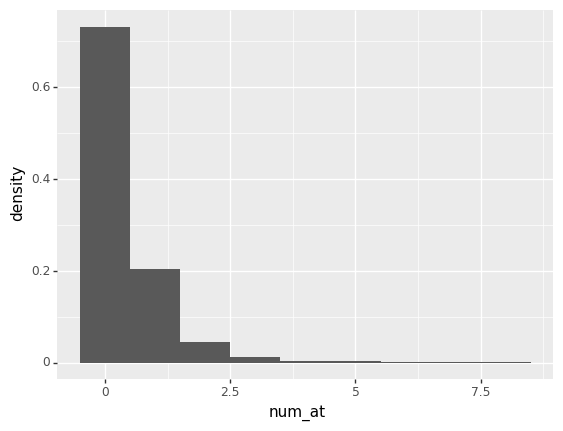

<ggplot: (8786127998076)>
num_at  target
0       False     2979
        True      2595
1       False     1034
        True       519
2       False      241
        True       102
3       False       46
        True        41
4       False       20
        True        11
5       False       15
        True         3
6       False        5
7       False        1
8       False        1
dtype: int64


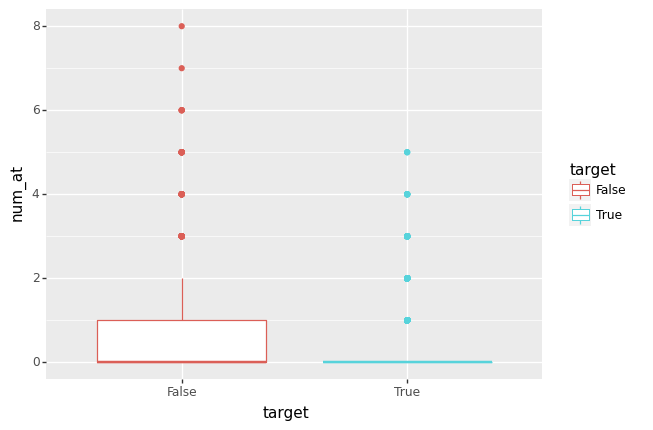

<ggplot: (8786127422618)>
Number of different at : 2317
Number of  at : 2759
@youtube            83
@                   44
@arianagrande       11
@foxnews             9
@usatoday            9
@potus               9
@change              9
@emmerdale           8
@justinbieber        7
@djicemoon           7
@stretcher           6
@towel               6
@mikeparractor       6
@invalid             5
@viralspell          5
@ap                  5
@youngheroesid       5
@usagov              5
@gop                 4
@michael5sos         4
@diamondkesawn       4
@realdonaldtrump     4
@raynbowaffair       4
@rexyy               4
@grazed              4
@local_arsonist      4
@kurtschlichter      4
@lonewolffur         4
@unsuckdcmetro       4
@worldnetdaily       4
dtype: int64


In [104]:
analyse_pattern(Patterns.MENTION_PATTERN,'at')

In [91]:
train.loc[train['at'].apply(lambda x:'@youtube' in x),['text','target']].values

array([['Man Goes into Airplane Engine Accident: http://t.co/TYJxrFd3St via @YouTube',
        True],
       ['Pilot Dies In Plane Crash At Car Festival https://t.co/kQ9aE6AP2B via @YouTube #Crash #Aircraft #Airplane #Pilot #Death #Accident #CarFest',
        True],
       [':StarMade: :Stardate 3: :Planetary Annihilation:: http://t.co/I2hHvIUmTm via @YouTube',
        True],
       ['Minecraft- NIGHT LUCKY BLOCK MOD (BOB APOCALYPSE WITHER 2.0 &amp; MORE!) Mod Showcase Popularmmos: http://t.co/TNgYE2FKlv via @YouTube',
        False],
       ['I liked a @YouTube video http://t.co/ki1yKrs9fi Minecraft: NIGHT LUCKY BLOCK MOD (BOB APOCALYPSE WITHER 2.0 &amp; MORE!) Mod Showcase',
        False],
       ['I liked a @YouTube video from @slimebeast http://t.co/ulr6MyklnH Town of Salem | How to Win as The Arsonist',
        False],
       ["I liked a @YouTube video http://t.co/TNXQuOr1wb Kalle Mattson - 'Avalanche' (Official Video)",
        False],
       ['I added a video to a @YouTube play

Around 25% of the Tweets have @'s. The number of mentions could be used as a feature to classify disaster tweets.

## URLs

count    7613.000000
mean        0.620255
std         0.664104
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: num_urls, dtype: float64


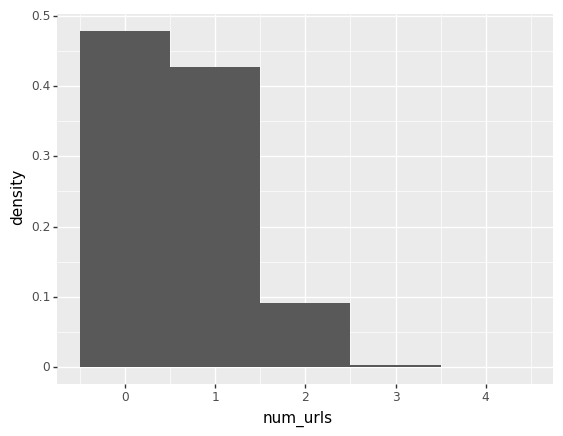

<ggplot: (8786127877885)>
num_urls  target
0         False     2543
          True      1099
1         False     1414
          True      1834
2         False      369
          True       329
3         False       13
          True         9
4         False        3
dtype: int64


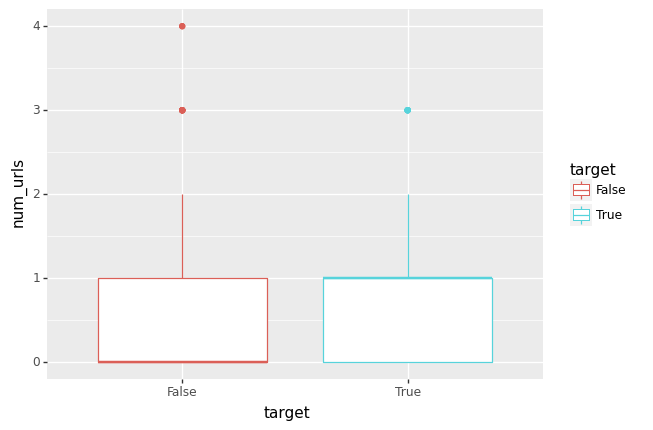

<ggplot: (8786128045189)>
Number of different urls : 4599
Number of  urls : 4722
http://t.co/qew4c5m1xd     9
http://t.co/q2eblokeve     6
http://t.co/ksawlyux02     6
http://t.co/encmhz6y34     6
http://t.co/vvplfqv58p     5
http://t.co/cybksxhf7d     5
http://t.co/wvj39a3bgm     4
http://t.co/thoyhrhkfj     4
http://t.co/zujwuiomb3     4
http://t.co/viwxy1xdyk     4
https://t.co/rqwuoy1fm4    4
http://t.co/o91f3cyy0r     4
https://t.co/moll5vd8yd    4
http://t.co/lvlh3w3awo     4
http://t.co/nnmqlz91o9     4
https://t.co/e8dl1lncvu    3
http://t.co/v3azwoamzk     3
https://t.co/dehmym5lpk    3
http://t.co/cedcugeuws     3
http://t.co/bbdpnj8xsx     3
http://t.co/9nwajli9cr     3
http://t.co/0wratka2jl     3
http://t.co/yduixefipe     2
http://t.co/po19h8ycnd     2
http://t.co/jlzk2hdetg     2
http://t.co/cgf61fpmr0     2
http://t.co/afmkcfn1tl     2
http://t.co/j5mkcbkcov     2
http://t.co/mg5eajelul     2
http://t.co/vam5podgyw     2
dtype: int64


In [100]:
analyse_pattern(Patterns.URL_PATTERN,'urls')

In [94]:
train[train['num_urls']>0].head().text.values

array(['@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C',
       'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
       '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi',
       'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N',
       'INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA'],
      dtype=object)

More than 50% of the tweets contain at least one URL. The number of URLs may be used as a feature to classify tweets. In cleanup of the tweet texts URLs should be removed.

### Smileys

count    7613.000000
mean        0.005780
std         0.077522
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: num_smileys, dtype: float64


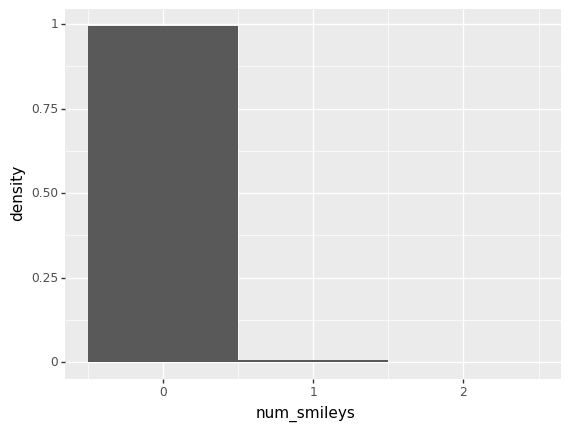

<ggplot: (8726866691295)>
num_smileys  target
0            False     4304
             True      3266
1            False       38
             True         4
2            True         1
dtype: int64


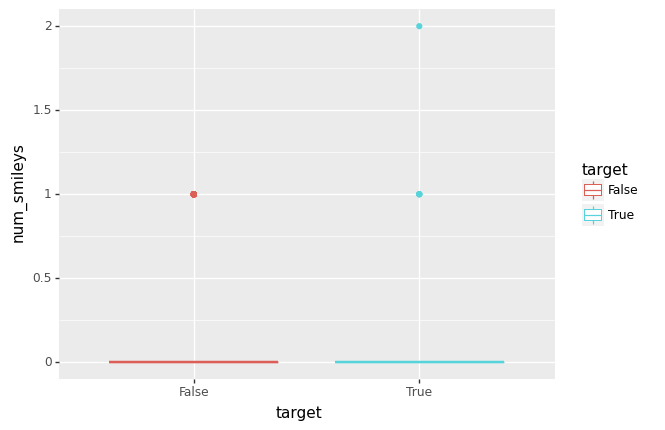

<ggplot: (8726861785881)>
Number of different smileys : 11
Number of  smileys : 44
:)       16
:(        9
:-)       6
;)        6
:-)))     1
:))))     1
:\\\      1
:))       1
;-)       1
:-(       1
:)))      1
dtype: int64


In [21]:
analyse_pattern(re.compile(r"(?:\sX|:|;|=)(?:-)?(?:\)+|\(|O|D|P|S|\\|\/\s){1,}"),'smileys')

In [22]:
train[train['num_smileys']>0].head().text.values

array(['London is cool ;)', 'Cooool :)',
       "@ACarewornHeart Have a good un fella sorry I won't be there to get annihilated with you :(",
       'THANKS!!!!! @COUNT DANTE.  :)  DO JOIN US BY FOLLOWING THE @ANNIHILATION ZONE.  JOHNNY.',
       "@alexandrapullin It is indeed. If the apocalypse comes this week I know where I'll be :)"],
      dtype=object)

In [23]:
train[train['num_smileys']>0].head().smileys

21     [;)]
28     [:)]
217    [:(]
268    [:)]
291    [:)]
Name: smileys, dtype: object

Only 44 smileys in the tweets, just remove them.

## Emojis

count    7613.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: num_emojis, dtype: float64


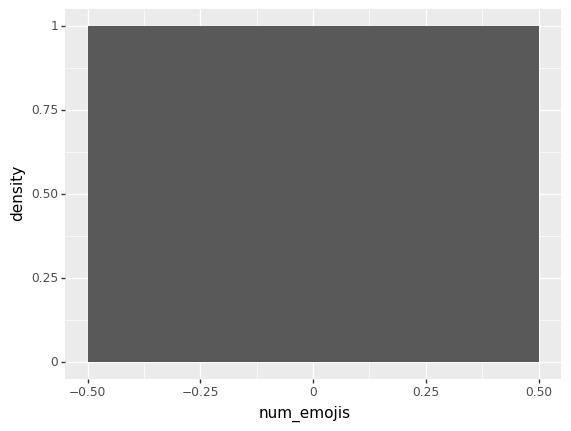

<ggplot: (8726866762641)>
num_emojis  target
0           False     4342
            True      3271
dtype: int64


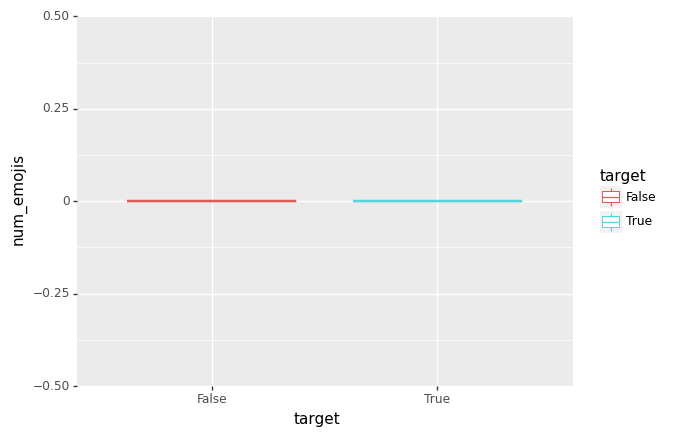

<ggplot: (8726866095668)>
Number of different emojis : 0
Number of  emojis : 0
Series([], dtype: int64)


In [27]:
analyse_pattern(Patterns.EMOJIS_PATTERN,'emojis')

No emojis (because of broken text encoding)

## Reserved words

count    7613.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: num_reserved_words, dtype: float64


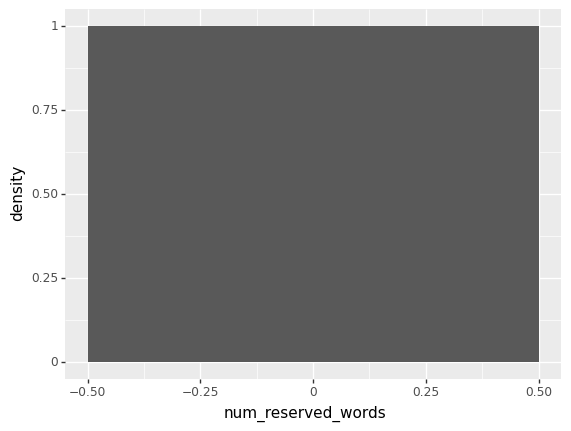

<ggplot: (8726866721314)>
num_reserved_words  target
0                   False     4342
                    True      3271
dtype: int64


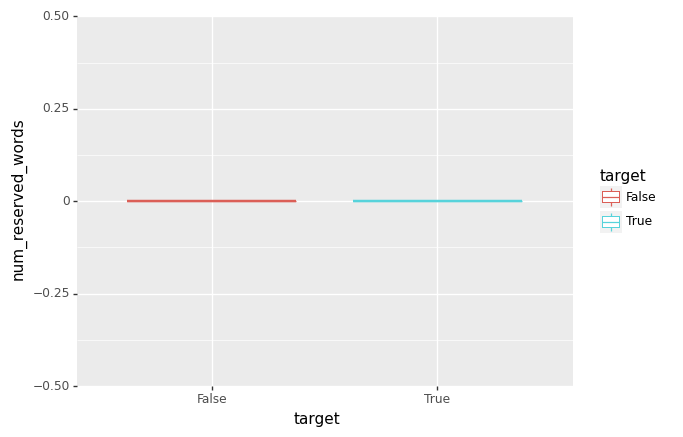

<ggplot: (8726861803987)>
Number of different reserved_words : 0
Number of  reserved_words : 0
Series([], dtype: int64)


In [28]:
analyse_pattern(Patterns.RESERVED_WORDS_PATTERN,'reserved_words')

No reserved words used.

## Text length

In [20]:
train['text_len'] = train['text'].apply(len)
train.head()

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [22]:
from plotnine import *

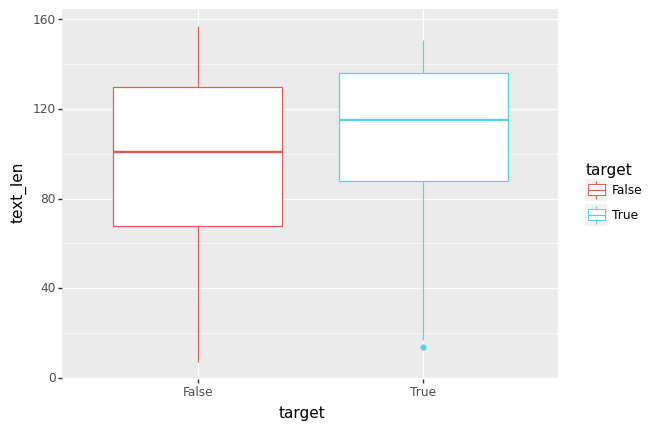

<ggplot: (8727499709001)>

In [23]:
ggplot(train, aes(x='target', y='text_len',color='target'))+geom_boxplot()

Disaster tweets seem to be a bit longer on average.

# Conclusion

## Cleanup
* Remove text duplications
* Keyword and location have missing data that might need to be taken care of
* Remove %20 in keywords, replace by whitespace?
* Clean up the # symbol in tweets (but retain the hash words itself, since they are often part of the tweet content. Perhaps also retain tag (meta) information)
* Clean up @'s in tweet text (but perhaps retain @ (meta) information)
* Clean up urls in tweet text (but perhaps retain url (meta) information)
* Clean up smileys in tweet text

## Feature Engineering Ideas

### Keywords
Convert keywords into something more useful for classification?
* Stem/lemmatize them
* Convert to word vecs?
* Cluster?

### Text
* Store metafeatures
  * Text length
  * Number of hash tags
  * Number of mentions
  * Number of URLs
* Get hashtags
* Model-specific preprocessing (stemming, word vec, ..)

### Location
Use missing/non-missing as a feature.

Convert location into something more useful? Use a geocoder to convert to longitude/lattitude and to find out of the location is a valid position on the world.